# Beam Model

## Kinematics

Consider a beam of length L  with a straight reference configuration and denote by $s$ the arclength in this configuration. Without loss of generality, let us use a Cartesian reference system $(O,\underline{e}_1,\underline{e}_2)$ with the origin at the left end of the beam and $\underline{e}_1$ oriented as the beam in the reference configuration. Hence the reference configuration can be written with the following parametric representation

$$
\underline x_R(s) = s \,\underline{e_1} 
$$

The current cunfiguration is given by 

$$
\underline x(s) =   x(s) \underline{e}_1 + y(s) \underline{e}_2 = 
(s+u(s)) \underline{e}_1 + v(s) \underline{e}_2
$$

where $\underline u(s)= u(s) \underline{e}_1 + v(s) \underline{e}_2$ is the displacement vector, with the axial ($u$) and transversal ($v$) components, in the reference configuration.


The unit tangent vector to the current configuration is given by

\begin{equation}
\underline{t}(s) = \dfrac{\underline{x}'(s)}{\Vert{\underline{x}'(s)}\Vert} = \cos\alpha(s)\,\underline{e}_1 + \sin\alpha(s) \,\underline{e}_2
\end{equation}

where, in the last equality, we introduced the angle $\alpha(s)$ between the tangent $\underline{t}(s)$ and $\underline{e}_1$.

The parameter $s$  is the arclength of the beam in the reference configuration. 

The length of a infinitesimal segment of the current deformation is, using Pythagorean theorem and $dx=x'(s)ds$, $dy=y'(s)ds$:

$$
d\tilde s = \sqrt{dx^2+dy^2} = \sqrt{x'(s) +y'(s)^2}\,ds = \Vert\underline  x'(s)\Vert ds
$$

The arclength in the current configuration is 

$$\tilde s=\int_0^s \Vert\underline  x'(s)\Vert ds$$. 

We define the following **deformations measures** for the beam:

\begin{equation}
\begin{cases}
\epsilon(s) = \Vert{\underline{x}'(s)}\Vert - 1 = \sqrt{(1+u'(s))^2+v'(s)^2}-1&(extension)\\
\kappa(s) = \alpha'(s) & (curvature)
\end{cases}
\end{equation}

When $\epsilon(s)=0$ the beam is *inextensible* and $s$ is an arc-length also in the current configuration. 

We consider in the following the case of an **inextensible beam** for which
$$
\underline{x}'(s) = \cos\alpha(s)\,\underline{e}_1 + \sin\alpha(s) \,\underline{e}_2,\qquad \kappa(s) = \alpha'(s) 
$$

# Representation of the beam configuration with matplotlib

We can use two `python` packages, `numpy` and `matplotlib` to represent the beam.

First let us define the reference configuration as two functions:

In [1]:
import numpy as np
def xR(s):
    return s
def yR(s):
    return 0.*s
s = np.linspace(0.,1.,100);

We can represent it using `matplotlib`

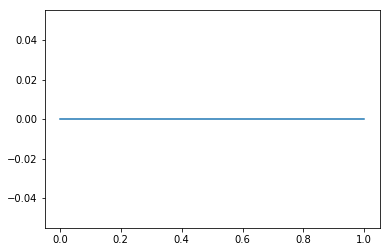

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline  

plt.plot(xR(s),yR(s))

Then we can do it better with a possible current configuration

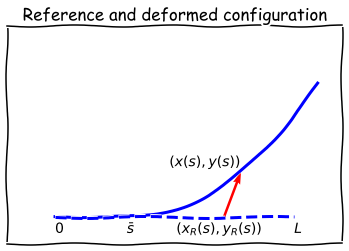

In [4]:
sb = 0.3
x = np.piecewise(s, [s < sb , s >= sb], [lambda s: s, lambda s: 1.1*s])
y = np.piecewise(s, [s < sb , s >= sb], [lambda s: 0, lambda s: .5*(s-sb)**2])

with plt.xkcd():
    fig, ax = plt.subplots()
    ax.plot(x,y,color='b',ls='-',lw=3)
    ax.plot(xR(s),yR(s),color='b', ls='--', lw=3)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("Reference and deformed configuration")
    ax.set_xlim(-0.2, 1.2)
    ax.set_ylim(-0.05, .35)
    ax.quiver(xR(s[-30]),yR(s[-30]),x[-30]-xR(s[-30]),y[-30]-yR(s[-30]),color='r',scale_units='xy', angles='xy', scale=1)
    ax.text(xR(s[-30])-.2,yR(s[-30])-.03,r'$({x}_R(s),y_R(s))$')
    ax.text(x[-30]-.3,y[-30]+.01,r'$({x}(s),y(s))$')
    ax.text(xR(sb),yR(sb)-.03,r'$\bar s$')
    ax.text(xR(0),yR(0)-.03,r'$0$')
    ax.text(xR(1),yR(1)-.03,r'$L$')

**Exercice:** calculate and plot the extension and curvature of the current deformation given above. 

## Variational Formulation - nonlinear model

We present below the nonlinear model for a beam loaded with an end-force 
$$\underline F = F\,(\cos \theta \underline e_1+\sin \theta \underline e_2)$$
applied at $s=L$.

We develop a model valid under the following assumptions:

**H1.** The beam is inxtensible

**H2.** The beam is flexible and the energy per unit line required to bend the beam is proportional to the square of the curvature $\kappa$:
$$
W(\kappa) = EI \dfrac{\kappa^2}{2},\qquad \textit{(elastic energy density)}
$$
where $EI$ is the bending stiffness, $E$ being the Young modulus and $I$ the quadratic moment of the cross section with respect to the bending axis. For a beam with a rectangular cross-section of width $b$ and height $h$, $I=bh^3/12$.
The total elastic energy of the beam is
$$
\int_0^L W(\alpha'(s))\,\mathrm{d}s
$$
 


### Energies (case withouf debonding)

Let us consider the case of beam of length $L$, bending stiffness $EI$ clamped on $s=0$.

* The  elastic energy of the beam is given by  
$$
\mathcal{E}(\alpha)=\int_{0}^L\dfrac{EI}{2} \alpha'(s)^2 \,ds
$$

*  The potential energy of the external load is
$$
-\underline F\cdot \underline x(L) =-\underline F\cdot \int_{ 0}^L\underline t(\alpha(s))\,\mathrm d s
$$

**Exercice:** 
Using the principle of the minimum of the potential energy and basic arguments of the calculus of variations show that the equilibrium equation of the beam is:

$$
\alpha''(s)+\frac{F}{EI}(\ldots)
$$

### Numerical solution

We use the function `solve_bvp` of the python module `scipy` (https://scipy-lectures.org/index.html) to solve the non-linea rboundary value problem. An analougous function should be available in matlab.

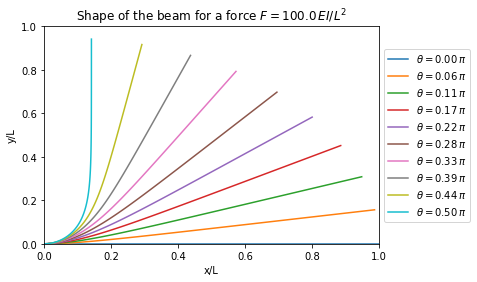

In [81]:
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt
import numpy as np

def T(f,theta,alpha):
    return f*np.array([-np.sin(alpha)*np.cos(theta)+
                     np.cos(alpha)*np.sin(theta)]) 

def bc(ya, yb):
    return np.array([ya[0], ya[2], ya[3], yb[1]])

def beam_solver(f,theta,s,y):
    def fun(s, y):
        alpha = y[0]
        return np.vstack((y[1], 
                      -T(f,theta,alpha),
                      np.cos(alpha),
                      np.sin(alpha)))

    res = solve_bvp(fun, bc, s, y)
    return res

s = np.linspace(0, 1, 100)
y = np.zeros((4, s.size))
thetas = np.linspace(0,np.pi/2,10)
for theta in thetas:
    f = 100
    res = beam_solver(f,theta,s,y)
    y = res.sol(s)
    x_plot = y[2]
    y_plot = y[3]
    plt.plot(x_plot, y_plot, "-",label=r"$\theta = {:04.2f} \,\pi$".format(theta/np.pi))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("x/L")
plt.ylabel("y/L")
plt.ylim([0,1])
plt.xlim([0,1])
plt.title(r"Shape of the beam for a force $F= {:04.1f} \,EI/L^2$".format(f))
plt.show()


Let us consider the case of beam of length $L$, bending stiffness $EI$, bonded on a substrate for $s\in(0,\bar s)$.

* The  elastic energy of the beam is given by  
$$
\mathcal{E}(\alpha)=\int_{\bar s}^L\dfrac{EI}{2} \alpha'(s)^2 \,ds
$$
* The  debonding energy is 
$$
G_c\,b\,(L-\bar s)
$$
*  The potential energy of the external load is
$$
-\underline F\cdot \underline x(L) =-\underline F\cdot \left(\bar s \underline e_1+\int_{\bar s}^L\underline t(\alpha(s))\mathrm d s\right)
$$
